In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [34]:
df.info() # checking null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

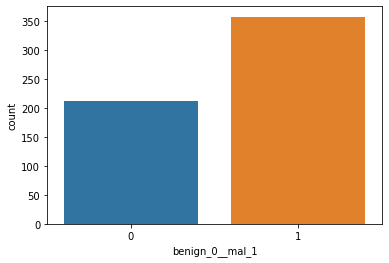

In [36]:
sns.countplot(x='benign_0__mal_1', data=df)  # checking label counts

<AxesSubplot:>

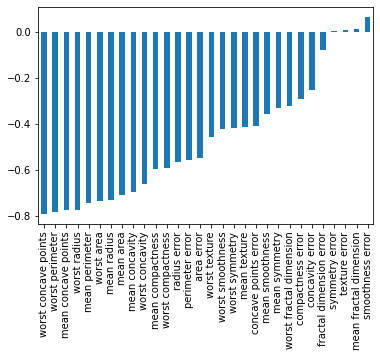

In [37]:
# visually checking correlation of features against label
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

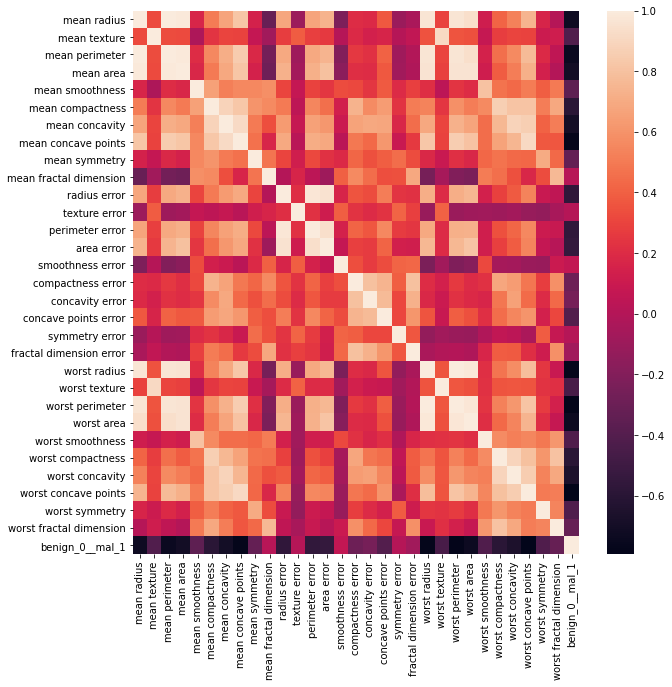

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())  # correlation heatmap of features

### Training the model

In [43]:
X = df.drop('benign_0__mal_1', axis=1).values  # removing label from df
y = df['benign_0__mal_1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# scaling the data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid')) # sigmoid since binary

model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
14/14 [==============================] - 0s 11ms/step - loss: 0.6914 - val_loss: 0.6544
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6402 - val_loss: 0.6065
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 0.5905 - val_loss: 0.5492
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 0.5296 - val_loss: 0.4899
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4812 - val_loss: 0.4339
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4307 - val_loss: 0.3821
Epoch 7/500
14/14 [==============================] - 0s 3ms/step - loss: 0.3761 - val_loss: 0.3368
Epoch 8/500
14/14 [==============================] - 0s 3ms/step - loss: 0.3245 - val_loss: 0.3014
Epoch 9/500
14/14 [==============================] - 0s 3ms/step - loss: 0.3083 - val_loss: 0.2680
Epoch 10/500
14/14 [==============================] - 0s 3ms/step - loss: 0.2851 - val_loss: 0.2446
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0522 - val_loss: 0.1307
Epoch 84/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0573 - val_loss: 0.1184
Epoch 85/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0594 - val_loss: 0.1216
Epoch 86/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0499 - val_loss: 0.1252
Epoch 87/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0639 - val_loss: 0.1229
Epoch 88/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0404 - val_loss: 0.1261
Epoch 89/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0408 - val_loss: 0.1228
Epoch 90/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.1283
Epoch 91/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0360 - val_loss: 0.1226
Epoch 92/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0493 - val_loss: 0.1225
Epoch 93/500


14/14 [==============================] - 0s 3ms/step - loss: 0.0310 - val_loss: 0.1485
Epoch 165/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0367 - val_loss: 0.1523
Epoch 166/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0376 - val_loss: 0.1572
Epoch 167/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0388 - val_loss: 0.1398
Epoch 168/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0446 - val_loss: 0.1666
Epoch 169/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0278 - val_loss: 0.1460
Epoch 170/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0281 - val_loss: 0.1591
Epoch 171/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0316 - val_loss: 0.1463
Epoch 172/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0459 - val_loss: 0.1553
Epoch 173/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0469 - val_loss: 0.1429
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0232 - val_loss: 0.1658
Epoch 246/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0247 - val_loss: 0.1683
Epoch 247/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0224 - val_loss: 0.1659
Epoch 248/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0341 - val_loss: 0.1885
Epoch 249/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0285 - val_loss: 0.1569
Epoch 250/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0222 - val_loss: 0.1750
Epoch 251/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0255 - val_loss: 0.1612
Epoch 252/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0307 - val_loss: 0.1647
Epoch 253/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0330 - val_loss: 0.1731
Epoch 254/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0356 - val_loss: 0.1560
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0206 - val_loss: 0.1779
Epoch 327/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0151 - val_loss: 0.1723
Epoch 328/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0137 - val_loss: 0.1783
Epoch 329/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.1829
Epoch 330/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0266 - val_loss: 0.1823
Epoch 331/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0221 - val_loss: 0.1730
Epoch 332/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0299 - val_loss: 0.1845
Epoch 333/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0136 - val_loss: 0.1882
Epoch 334/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0386 - val_loss: 0.1664
Epoch 335/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.1856
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0207 - val_loss: 0.1806
Epoch 408/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.1856
Epoch 409/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0155 - val_loss: 0.1876
Epoch 410/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0138 - val_loss: 0.1845
Epoch 411/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0163 - val_loss: 0.2081
Epoch 412/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0259 - val_loss: 0.1759
Epoch 413/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0246 - val_loss: 0.2108
Epoch 414/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0149 - val_loss: 0.1761
Epoch 415/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0127 - val_loss: 0.2095
Epoch 416/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0192 - val_loss: 0.1777
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0129 - val_loss: 0.1937
Epoch 489/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0215 - val_loss: 0.1910
Epoch 490/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0131 - val_loss: 0.2155
Epoch 491/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0231 - val_loss: 0.1812
Epoch 492/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0209 - val_loss: 0.2278
Epoch 493/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0201 - val_loss: 0.1702
Epoch 494/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0143 - val_loss: 0.2393
Epoch 495/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.1740
Epoch 496/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0241 - val_loss: 0.2119
Epoch 497/500
14/14 [==============================] - 0s 5ms/step - loss: 0.0126 - val_loss: 0.1823
Epoc

<AxesSubplot:>

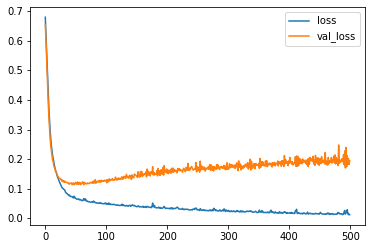

In [46]:
loss = pd.DataFrame(model.history.history)  # checking loss for overfitting
loss.plot()

Past the point at which the graph of loss and validation loss diverge, the model is overfitting, hence epochs too high.

Redefining model, we can use callbacks to prevent overfitting.

In [49]:
X = df.drop('benign_0__mal_1', axis=1).values  # removing label from df
y = df['benign_0__mal_1'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# scaling the data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid')) # sigmoid since binary

model.compile(loss='binary_crossentropy', optimizer='adam')

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[earlystop])



Epoch 1/500
14/14 [==============================] - 0s 10ms/step - loss: 0.7068 - val_loss: 0.6834
Epoch 2/500
14/14 [==============================] - 0s 11ms/step - loss: 0.6693 - val_loss: 0.6488
Epoch 3/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6359 - val_loss: 0.6104
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 0.5982 - val_loss: 0.5674
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 0.5462 - val_loss: 0.5209
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 0.5055 - val_loss: 0.4757
Epoch 7/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4617 - val_loss: 0.4305
Epoch 8/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4260 - val_loss: 0.3893
Epoch 9/500
14/14 [==============================] - 0s 3ms/step - loss: 0.3705 - val_loss: 0.3467
Epoch 10/500
14/14 [==============================] - 0s 3ms/step - loss: 0.3476 - val_loss: 0.3130
Epoch 1

Epoch 83/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0626 - val_loss: 0.0993
Epoch 84/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0641 - val_loss: 0.0970
Epoch 85/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0579 - val_loss: 0.0999
Epoch 86/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0553 - val_loss: 0.1046
Epoch 87/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0442 - val_loss: 0.0993
Epoch 88/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0517 - val_loss: 0.1009
Epoch 89/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0512 - val_loss: 0.0982
Epoch 90/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0585 - val_loss: 0.1097
Epoch 91/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0474 - val_loss: 0.1040
Epoch 00091: early stopping


This allows us to use any arbitrary value for epochs knowing the callback will prevent overfitting

<AxesSubplot:>

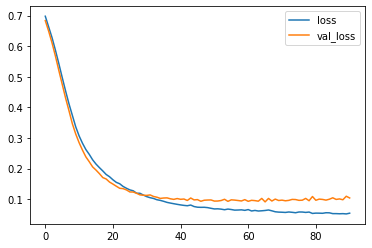

In [50]:
modelloss = pd.DataFrame(model.history.history)
modelloss.plot()

We can further prevent overfitting by using dropout layers, which essentially drop out a percentage of neurons from each layer

In [51]:
#redefining the new model
model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid')) # sigmoid since binary

model.compile(loss='binary_crossentropy', optimizer='adam')

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[earlystop])


Epoch 1/500
14/14 [==============================] - 0s 9ms/step - loss: 0.7241 - val_loss: 0.6836
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 0.7068 - val_loss: 0.6675
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6939 - val_loss: 0.6491
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6467 - val_loss: 0.6247
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6397 - val_loss: 0.5998
Epoch 6/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6163 - val_loss: 0.5727
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 0.6288 - val_loss: 0.5531
Epoch 8/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5722 - val_loss: 0.5250
Epoch 9/500
14/14 [==============================] - 0s 3ms/step - loss: 0.5631 - val_loss: 0.4953
Epoch 10/500
14/14 [==============================] - 0s 3ms/step - loss: 0.5580 - val_loss: 0.4686
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.0986 - val_loss: 0.1010
Epoch 84/500
14/14 [==============================] - 0s 3ms/step - loss: 0.1305 - val_loss: 0.1024
Epoch 85/500
14/14 [==============================] - 0s 3ms/step - loss: 0.1244 - val_loss: 0.1014
Epoch 86/500
14/14 [==============================] - 0s 3ms/step - loss: 0.1102 - val_loss: 0.1056
Epoch 87/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0785 - val_loss: 0.1253
Epoch 88/500
14/14 [==============================] - 0s 3ms/step - loss: 0.1077 - val_loss: 0.1157
Epoch 89/500
14/14 [==============================] - 0s 3ms/step - loss: 0.1041 - val_loss: 0.1072
Epoch 90/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0984 - val_loss: 0.1132
Epoch 91/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0750 - val_loss: 0.1076
Epoch 92/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0940 - val_loss: 0.1184
Epoch 93/500


<AxesSubplot:>

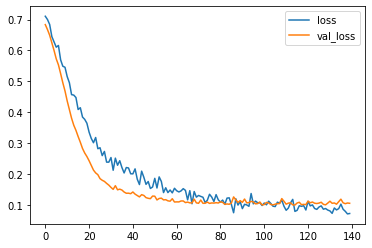

In [52]:
loss = pd.DataFrame(model.history.history)
loss.plot()

This is an improvement to both previous graphs, since both losses are being minimized at the same rate. 

## Making predictions on the test data set using the model

In [55]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[54  1]
 [ 3 85]]


/usr/local/lib64/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


The model was able to predict malginiancy with 97% accuracy